In [1]:
import pandas as pd
data = pd.read_csv("winequality-white1.csv")
y = data.iloc[:,-1]
X = data.iloc[:, :-1]
print(X.shape)
print(y.shape)


(4897, 11)
(4897,)


Feature ranking:
1. feature 10 (0.130114)
2. feature 1 (0.100371)
3. feature 7 (0.091805)
4. feature 5 (0.090274)
5. feature 6 (0.087413)
6. feature 8 (0.085285)
7. feature 3 (0.084695)
8. feature 2 (0.084166)
9. feature 4 (0.082988)
10. feature 9 (0.082604)
11. feature 0 (0.080284)


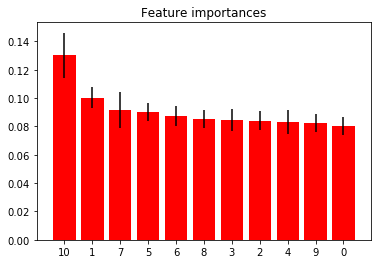

In [2]:
# print out the important features 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [4]:
# Create the model and fit the data
from sklearn.ensemble import BaggingClassifier

n_estimators = [10,20,30,50,80,100,120,150]
oob_errors = []


for n in n_estimators:
    bag_cls = BaggingClassifier(base_estimator=None, n_estimators=n,
                     max_samples=1.0, max_features=1.0, bootstrap=True,
                     bootstrap_features=False, oob_score=True, 
                     warm_start=False, n_jobs=6, random_state=1, verbose=1)
    bag_cls.fit(X_train,y_train)
    #y_pred = bag_reg.predict(X_test)
    oob_errors.append(bag_cls.oob_score_)


[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.3s finished
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    1.1s remaining:    2.2s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.8s finished
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.6s f

In [5]:
import numpy as np
print(oob_errors)


[0.58006535947712423, 0.6342592592592593, 0.64460784313725494, 0.65931372549019607, 0.66666666666666663, 0.66122004357298469, 0.66557734204793029, 0.66612200435729851]


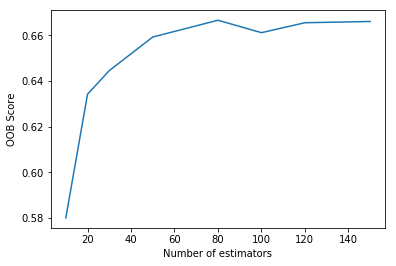

In [6]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimators,oob_errors)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()



In [7]:
from  sklearn.ensemble import RandomForestClassifier as RFC
oob_rfc = []
n_estimators = [10,20,30,50,80,100,120,150]
for n in n_estimators:
    rfc = RFC(n_estimators=n, criterion="gini",max_depth=None, min_samples_split=2, 
        min_weight_fraction_leaf=0.0,max_leaf_nodes=None, min_impurity_decrease=0.0,
        min_impurity_split=None,bootstrap=True,oob_score=True, n_jobs=6, 
                                        verbose=1, warm_start=False, class_weight=None)
    rfc.fit(X_train,y_train)
    oob_rfc.append(rfc.oob_score_)
    




[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s finished
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Done  38 tasks      | 

In [8]:

print(oob_rfc)


[0.58197167755991286, 0.625, 0.63916122004357301, 0.65795206971677556, 0.66857298474945537, 0.66339869281045749, 0.670479302832244, 0.67456427015250542]


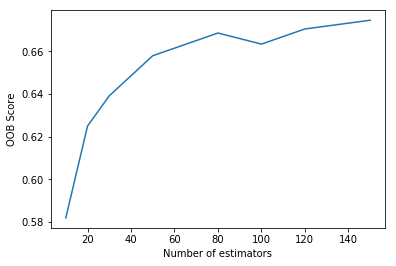

In [9]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimators,oob_rfc)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()

